In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Linear Regression
from sklearn.linear_model import LinearRegression



## Data Preprocessing

In [6]:
# dataset directory
path_steam = "./dataset/steam_modified.csv"
path_mobile = "./dataset/mobile_modified.csv"

# read csv files
data_steam = pd.read_csv(path_steam)
data_mobile = pd.read_csv(path_mobile)

# sort dataframe by column "date"
data_steam = data_steam.sort_values(by="release_date")

# convert dd/mm/yyyy to yyyy-mm-dd
data_mobile["Original Release Date"] = pd.to_datetime(data_mobile["Original Release Date"], yearfirst=True) 
data_mobile = data_mobile.sort_values(by="Original Release Date")

# extract year and month and add t0 new columns
yr_steam = []
month_steam = []
for item in data_steam.get("release_date"):
    temp = item.split("-")
    yr_steam.append(temp[0])
    month_steam.append(temp[1])

# add new Columns to DataFrame data_steam
data_steam["year"] = yr_steam
data_steam["month"] = month_steam

# extract year and month and add tp new columns
yr_mobile = []
month_mobile = []
for item in data_mobile.get("Original Release Date"):
    temp = str(item).split("-")
    yr_mobile.append(temp[0])
    month_mobile.append(temp[1])

# add new Columns to DataFrame data_steam
data_mobile["year"] = yr_mobile
data_mobile["month"] = month_mobile

In [7]:
# extract name of Columns
#ave_price_steam = np.average(data_steam.get("price"))
print("The total columns inside steam:")
print([item for item in data_steam.columns])
print("\nThe total columns inside mobile:")
print([item for item in data_mobile.columns])

# STEAM extract Column from data Frame
price_steam = data_steam.get("price")
releaseTime_steam = data_steam.get("release_date")
averageRating_steam = data_steam.get("average_ratings")
medianPlaytime_steam = data_steam.get("median_playtime")
ratingCount_steam = data_steam.get("median_playtime")
#print("\n release time:")


# MOBILE 
averageRating_mobile = data_mobile.get("Average User Rating")
ratingCount_mobile = data_mobile.get("User Rating Count")
releaseTime_mobile = data_mobile.get("Original Release Date")

price_mobile = data_mobile.get("Price")
price_mobile.astype(float, errors = 'ignore')


# preprocessing in-app purchase has motiple item
"""
Because the column "in-app purchase has several prices in a line,
so we calculate the average price and update the original Series.

"""
inapp_mobile = data_mobile.get("In-app Purchases")
average_inapp_mobile = []
for item in inapp_mobile:
    if pd.notna(item): 
        item = item.split(',')
        ave = 0
        for i in item:
            ave += float(i)
        average_inapp_mobile.append(ave/len(item))
    else:
        average_inapp_mobile.append(0)

inapp_mobile = pd.Series(average_inapp_mobile, index=inapp_mobile.index)
data_mobile['inapp_mobile'] = inapp_mobile
# price + average of in_app purchase price    
totalprice_mobile = price_mobile.add(inapp_mobile, fill_value = 0)




The total columns inside steam:
['Unnamed: 0', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'average_ratings', 'rating_count', 'median_playtime', 'owners', 'price', 'year', 'month']

The total columns inside mobile:
['Unnamed: 0', 'english', 'Name', 'Average User Rating', 'User Rating Count', 'Price', 'In-app Purchases', 'Developer', 'Age Rating', 'Genres', 'Original Release Date', 'year', 'month']


In [8]:
yr_month_steam = []
for item in releaseTime_steam:
    temp = str(item).split("-")
    yr_month = temp[0] + "-" + temp[1]
    yr_month_steam.append(yr_month)
yr_month_mobile = []
for item in releaseTime_mobile:
    temp = str(item).split("-")
    if len(temp[1]) == 1:
        temp[1] = '0' + temp[1]
    yr_month = temp[0] + '-' + temp[1]
    yr_month_mobile.append(yr_month)



## Prices of Steam and Mobile
Plot of the price of steam vs the price of mobile (w/o in-app purchase)

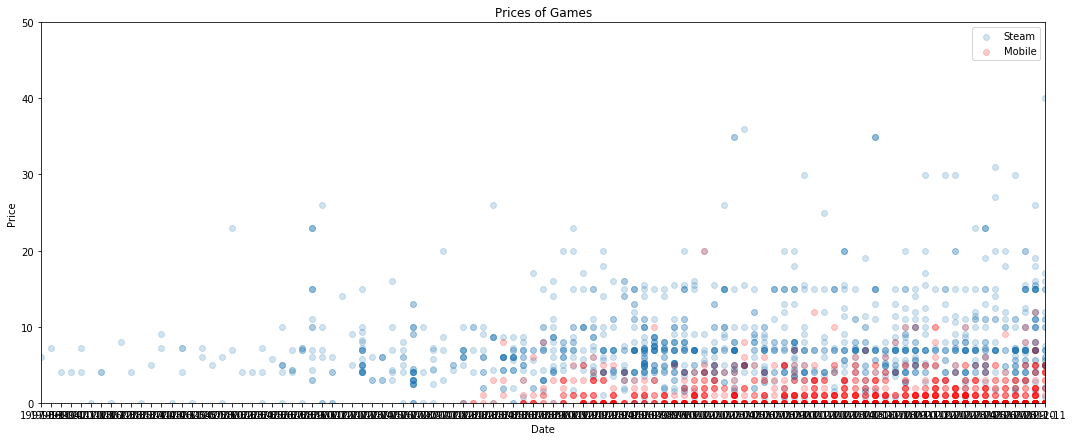

In [31]:
'''
Plot of the price of steam vs the price of mobile (w/o in-app purchase)
blue dot: price of steam
red dot: price of mobile
'''

x = np.array(yr_month_steam)
y = np.array(price_steam)
w = np.array(yr_month_mobile)
z = np.array(price_mobile)
plt.figure(figsize=(18,7))
plt.axis([0,100,0,50])
plt.scatter(x, y, alpha = 0.2, label="Steam")
plt.scatter(w, z, alpha = 0.2, color = 'r', label="Mobile")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Prices of Games")
plt.legend()
plt.show()



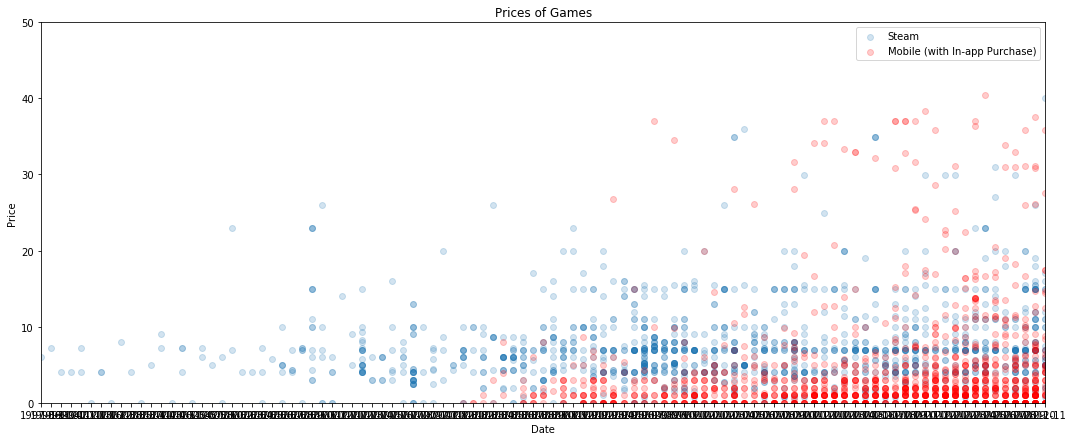

In [36]:
'''
Plot of the price of steam vs the price of mobile (w in-app purchase)
blue dot: price of steam
red dot: price of mobile
'''

x = np.array(yr_month_steam)
y = np.array(price_steam)
w = np.array(yr_month_mobile)
z = np.array(totalprice_mobile)
plt.figure(figsize=(18,7))
plt.axis([0,100,0,50])
plt.scatter(x, y, alpha = 0.2, label = "Steam")
plt.scatter(w, z, alpha = 0.2, color = 'r', label = "Mobile (with In-app Purchase)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Prices of Games")
#plt.xticks(np.arange(min(x),max(x),1))
plt.legend()
plt.show()

## Number of New Games in Each Year

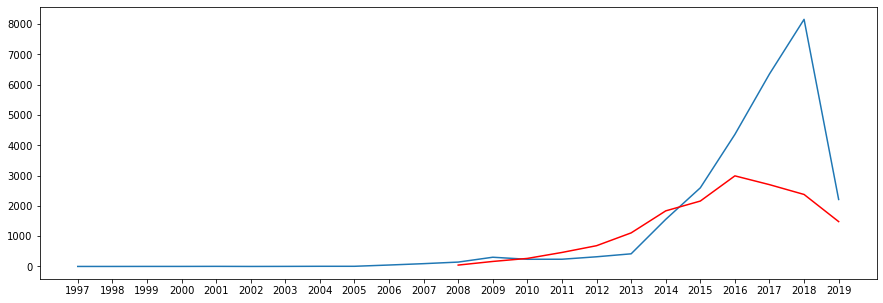

In [11]:
#number of launched games in each year
count_steam = data_steam.set_index(['year','month']).count(level='year')
launchYear_steam = count_steam.index
launchNumber_steam = count_steam['name']
count_mobile = data_mobile.set_index(['year', 'month']).count(level='year')
launchYear_mobile = count_mobile.index
launchNumber_mobile = count_mobile['Name']
y = np.array(launchNumber_steam)
x = np.array(launchYear_steam)
w = np.array(launchNumber_mobile)
z = np.array(launchYear_mobile)

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.plot(z,w, color='r')
#print(data_steam.set_index(['year','month']).count(level='year'))

## Number of New Game Launched in each Month

Text(0, 0.5, 'The Number of Games')

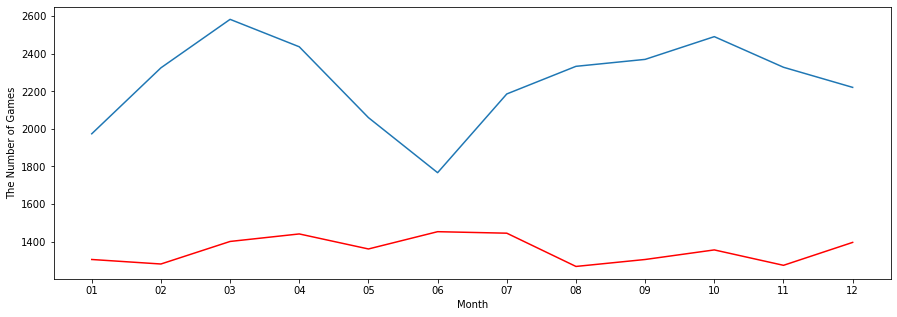

In [14]:
count_steam = data_steam.set_index(['year','month']).count(level='month')
launchYear_steam = count_steam.index
launchNumber_steam = count_steam['name']
count_mobile = data_mobile.set_index(['year', 'month']).count(level='month')
launchYear_mobile = count_mobile.index
launchNumber_mobile = count_mobile['Name']
y = np.array(launchNumber_steam)
x = np.array(launchYear_steam)
w = np.array(launchNumber_mobile)
z = np.array(launchYear_mobile)

plt.figure(figsize=(15,5))
plt.plot(x,y)
plt.plot(z,w, color='r')
plt.xlabel("Month")
plt.ylabel("The Number of Games")

## Average Price in each Year 

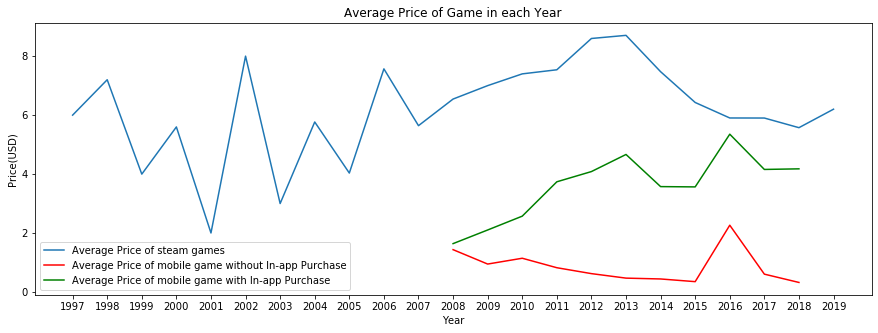

In [23]:
yr_steam = data_steam['year'].to_list()
# remove duplicate items in the list yr_steam
yr_steam = list(dict.fromkeys(yr_steam))
averagePrice_steam = []
for item in yr_steam:
    averagePrice_steam.append(np.average(data_steam[data_steam['year']==item]['price']))

yr_mobile = data_mobile['year'].to_list()
yr_mobile = list(dict.fromkeys(yr_mobile))
averagePrice_mobile = []
averageInapp_mobile = []
for item in yr_mobile:
    averagePrice_mobile.append(np.average(data_mobile[data_mobile['year']==item]['Price']))
    averageInapp_mobile.append(np.average(data_mobile[data_mobile['year']==item]['inapp_mobile']))
    

x = np.array(yr_steam)
y = np.array(averagePrice_steam)
w = np.array(yr_mobile)
z = np.array(averagePrice_mobile)
n = np.array(averageInapp_mobile)
plt.figure(figsize=(15,5))
plt.plot(x,y,label = "Average Price of steam games")
plt.plot(w,z,color='r', label = "Average Price of mobile game without In-app Purchase")
plt.plot(w,z+n, color='g', label = "Average Price of mobile game with In-app Purchase")
plt.xlabel("Year")
plt.ylabel("Price(USD)")
plt.title("Average Price of Game in each Year")
plt.legend()

Text(0.5, 1.0, 'Number of Game on different Platforms')

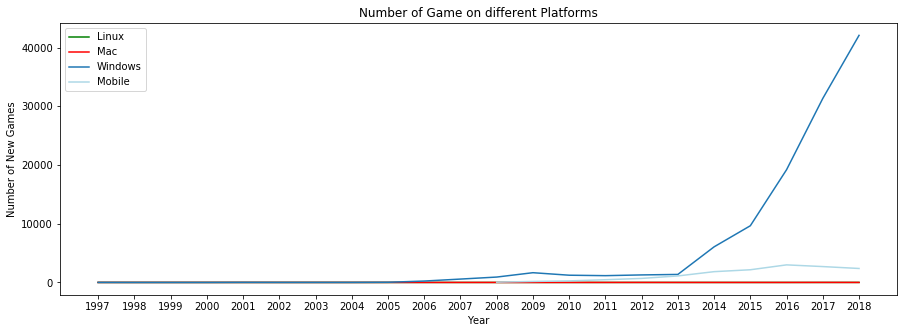

In [82]:
#platforms, genres
yr_steam = data_steam['year'].to_list()
yr_steam = list(dict.fromkeys(yr_steam))
windows = []
linux = []
mac = []
other = []

for item in yr_steam[:-1]:
    w = 0
    l = 0
    m = 0
    o = 0
    for p in data_steam[data_steam['year']==item]['platforms']:
        p.split(';')       
        for i in p:

            if p =="windows":
                w+=1
            elif p =="mac":
                m+=1
            elif p =="linux":
                l+=1
            else:
                o+=1
    windows.append(w)
    linux.append(l)
    mac.append(m)
    other.append(o)

plt.figure(figsize=(15,5))
yr_steam = np.array(yr_steam[:-1])
linux = np.array(linux)
windows = np.array(windows)
mac = np.array(mac)


#mobile
yr_mobile = data_mobile['year'].to_list()
yr_mobile = list(dict.fromkeys(yr_mobile))
mobile = []
for item in yr_mobile[:-1]:
    mobile.append(len(data_mobile[data_mobile['year']==item]))
    
#print(mobile)
yr_mobile = np.array(yr_mobile[:-1])
mobile = np.array(mobile)


# plot picture
plt.plot(yr_steam,linux, color='g', label='Linux')
plt.plot(yr_steam, mac, color='r', label='Mac')
plt.plot(yr_steam, windows, label='Windows')
plt.plot(yr_mobile, mobile, color='lightblue', label = "Mobile")
plt.legend()
plt.xlabel("Year")
plt.ylabel('Number of New Games')
plt.title('Number of Game on different Platforms')
#data_steam["platforms"]

## Linear Regression

coefficient of determination: 0.9866787211222958
[[2.99]
 [1.99]
 [0.  ]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]
[14212.   994. 25128. ...    nan    nan    nan]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

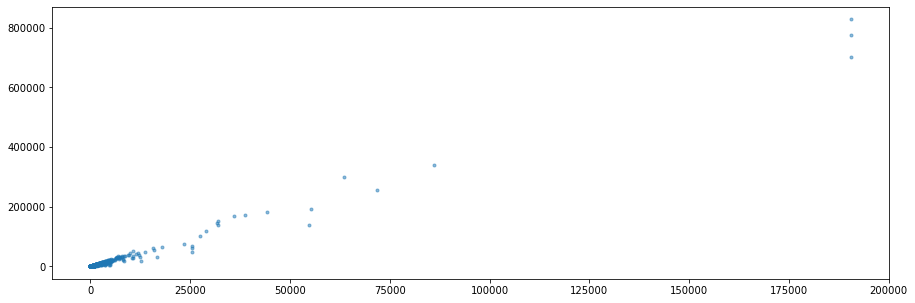

In [10]:
# Linear Regression
'''
Goal: Find correlation between median playtime and average rating times rating count with linear regression
:param x: median play time (steam)
:param y: average rating times rating count (steam)
'''
x = np.array(medianPlaytime_steam).reshape((-1, 1))
y = np.array(averageRating_steam*ratingCount_steam)

model = LinearRegression()
model.fit(x, y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
plt.figure(figsize=(15,5))
plt.plot(x,y,'.', alpha = 0.5)


w = np.array(price_mobile).reshape((-1, 1))
z = np.array(averageRating_mobile*ratingCount_mobile)
print(w)
print(z)
model = LinearRegression()
model.fit(w, z)
r_sq = model.score(w, z)
print('coefficient of determination:', r_sq)
plt.figure(figsize=(15,5))
plt.plot(w,z,'.')
